In [2]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [44]:
s2017 = pd.read_csv("statcast_by_inning2017.csv")
s2018 = pd.read_csv("statcast_by_inning2018.csv")
s2019 = pd.read_csv("statcast_by_inning2019.csv")

In [45]:
s2017.describe()

,game_pk,inning,pitchers_used,avg_launch_speed,avg_launch_angle,pitcher_id,run_scored,est_ba,est_woba,swinging_strikes,...,unknown_speed,ground_ball_distance,ground_ball_count,popup_count,line_drive_distance,line_drive_count,fly_ball_distance,fly_ball_count,fly_line_count,fly_line_distance
count,43114.000000,43114.000000,43114.000000,42983.000000,42983.000000,43114.000000,43114.000000,42294.000000,42294.000000,43114.000000,...,49.000000,30544.000000,43114.000000,43114.000000,21822.000000,43114.000000,20750.000000,43114.000000,43114.000000,32342.000000
mean,491302.676602,5.004291,1.121747,81.751295,15.074244,538420.124066,0.276198,0.302776,0.344507,1.739690,...,89.366244,34.646546,1.333604,0.210187,257.277333,0.738925,318.728693,0.658371,1.397296,286.393089
std,697.488076,2.647956,0.367729,8.508783,16.422923,75010.473991,0.447121,0.177467,0.234563,1.450483,...,4.686655,34.657956,1.033689,0.450693,68.575147,0.888925,57.033784,0.785913,1.179127,62.659290
min,490098.000000,1.000000,1.000000,28.100000,-68.200000,112526.000000,0.000000,0.000000,0.000000,0.000000,...,76.935000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,490696.000000,3.000000,1.000000,76.621111,4.800000,488768.000000,0.000000,0.162500,0.166667,1.000000,...,87.236000,8.000000,1.000000,0.000000,206.000000,0.000000,278.000000,0.000000,1.000000,247.500000
50%,491302.000000,5.000000,1.000000,82.125000,15.640000,543557.000000,0.000000,0.296250,0.313550,2.000000,...,89.684000,22.000000,1.000000,0.000000,259.500000,1.000000,320.000000,0.000000,1.000000,290.000000
75%,491907.000000,7.000000,1.000000,87.328571,25.775000,600526.000000,1.000000,0.422667,0.473250,3.000000,...,91.586000,52.333333,2.000000,0.000000,308.000000,1.000000,360.000000,1.000000,2.000000,329.750000
max,492513.000000,19.000000,5.000000,114.900000,88.000000,664701.000000,1.000000,1.000000,1.993000,11.000000,...,99.037000,412.000000,10.000000,3.000000,464.000000,8.000000,490.000000,6.000000,12.000000,490.000000


In [5]:
s2017a = s2017.iloc[:,0:15]
s2017b = s2017.iloc[:,15:30]
s2017c = s2017.iloc[:,30:53]

s2017b['run_scored'] = s2017a['run_scored']
s2017c['run_scored'] = s2017a['run_scored']

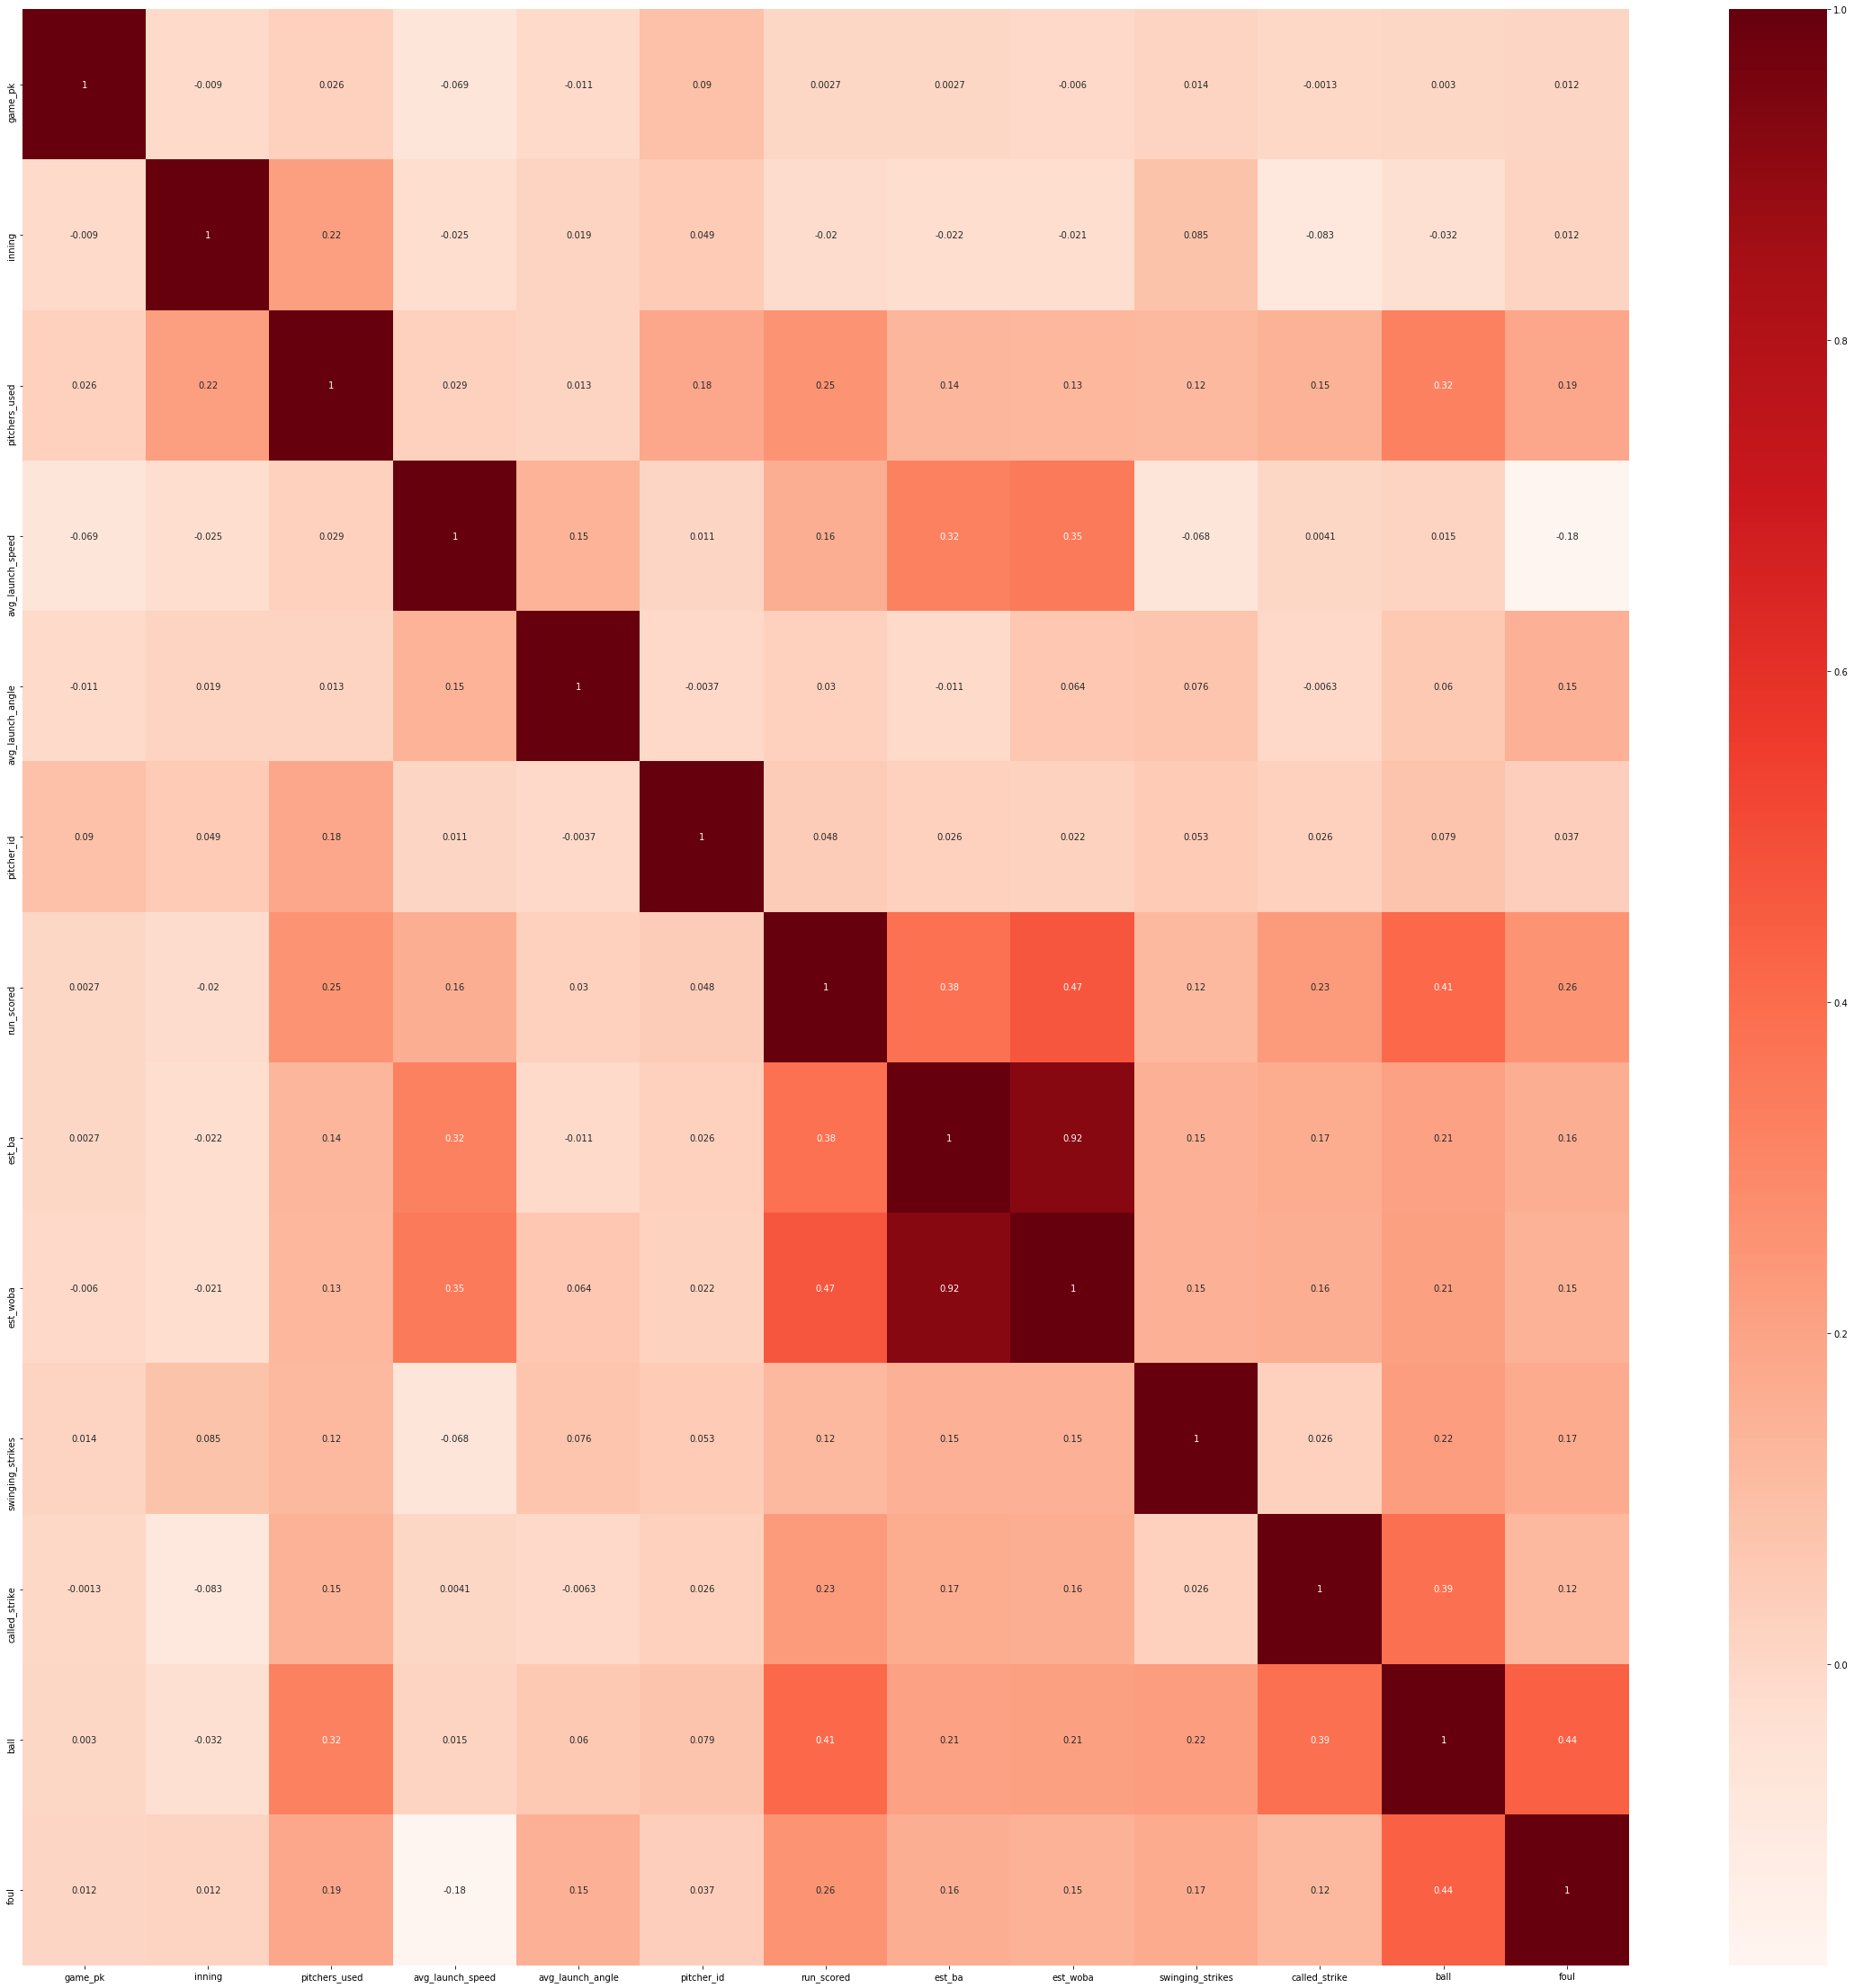

In [6]:
#Using Pearson Correlation
plt.figure(figsize=(40,40))
cor = s2017a.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Correlations 2017

In [7]:
cor = s2017.corr()
#Correlation with output variable
cor_target = abs(cor["run_scored"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

pitchers_used        0.254385
run_scored           1.000000
est_ba               0.381636
est_woba             0.469739
ball                 0.413481
foul                 0.256438
ball_in_play         0.588149
scoring_plays        0.849565
single               0.421900
double               0.377550
home_run             0.588010
line_drive_count     0.393094
fly_ball_distance    0.379965
fly_ball_count       0.328130
fly_line_count       0.515053
Name: run_scored, dtype: float64

Correlations 2018

In [8]:
cor = s2018.corr()
#Correlation with output variable
cor_target = abs(cor["run_scored"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

pitchers_used        0.261173
run_scored           1.000000
est_ba               0.357214
est_woba             0.442820
ball                 0.410194
foul                 0.253514
ball_in_play         0.588044
scoring_plays        0.855554
single               0.423114
double               0.389211
home_run             0.579763
line_drive_count     0.389585
fly_ball_distance    0.362154
fly_ball_count       0.338118
fly_line_count       0.519266
Name: run_scored, dtype: float64

Correlations 2019

In [9]:
cor = s2019.corr()
#Correlation with output variable
cor_target = abs(cor["run_scored"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.35]
relevant_features

run_scored           1.000000
est_ba               0.369749
est_woba             0.470527
ball_in_play         0.489780
scoring_plays        0.810220
single               0.388046
double               0.359743
home_run             0.579241
line_drive_count     0.355973
fly_ball_distance    0.401667
fly_line_count       0.481742
Name: run_scored, dtype: float64

## run_scored Grouping Statistics

In [53]:
statcast = pd.concat([s2017, s2018, s2019])
statcast.groupby("run_scored").mean()

,game_pk,inning,pitchers_used,avg_launch_speed,avg_launch_angle,pitcher_id,est_ba,est_woba,swinging_strikes,called_strike,...,unknown_speed,ground_ball_distance,ground_ball_count,popup_count,line_drive_distance,line_drive_count,fly_ball_distance,fly_ball_count,fly_line_count,fly_line_distance
run_scored,,,,,,,,,,,,,,,,,,,,,
0,529156.062646,5.049499,1.062859,82.064584,15.026384,555149.049200,0.259988,0.273088,1.769500,2.665047,...,88.992591,31.933486,1.210673,0.217076,254.354474,0.540331,302.188740,0.523306,1.063637,278.115070
1,529661.332923,4.963419,1.274354,84.963040,16.054806,563338.091087,0.406289,0.511629,2.175144,3.506778,...,88.209900,37.473707,1.719680,0.228615,260.361377,1.338384,345.861511,1.163296,2.501681,303.476614


In [54]:
y = statcast[['run_scored']]
statcast.drop(['game_pk', 'inning_topbot', 'game_date', 'run_scored'], axis=1, inplace=True)
X = statcast
X = X.fillna(0)

In [56]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y, X_1).fit()
model.pvalues[0:3]

const            9.573546e-51
inning           3.388901e-08
pitchers_used    2.306680e-29
dtype: float64

As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.
The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

In [12]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while(len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['inning', 'pitchers_used', 'avg_launch_speed', 'avg_launch_angle', 'est_ba', 'est_woba', 'swinging_strikes', 'ball', 'foul', 'hbp', 'ball_in_play', 'scoring_plays', 'walk', 'strikeout', 'single', 'double', 'triple', 'home_run', 'four_seam', 'slider', 'two_seam', 'curveball', 'changeup', 'sinker', 'cutter', 'pitch_unknow', 'four_seam_speed', 'slider_speed', 'curveball_speed', 'changeup_speed', 'sinker_speed', 'cutter_speed', 'popup_count', 'line_drive_distance', 'line_drive_count', 'fly_ball_distance', 'fly_line_count', 'fly_line_distance']


The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [57]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
# y = column_or_1d(y, warn=True)
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(X.columns)
print(rfe.support_)
print(rfe.ranking_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['inning', 'pitchers_used', 'avg_launch_speed', 'avg_launch_angle',
       'pitcher_id', 'est_ba', 'est_woba', 'swinging_strikes', 'called_strike',
       'ball', 'foul', 'hbp', 'ball_in_play', 'scoring_plays', 'walk',
       'strikeout', 'single', 'double', 'triple', 'home_run', 'four_seam',
       'slider', 'split_finger', 'two_seam', 'curveball', 'changeup',
       'knuckle_curve', 'sinker', 'cutter', 'pitch_unknow', 'four_seam_speed',
       'slider_speed', 'split_finger_speed', 'two_seam_speed',
       'curveball_speed', 'changeup_speed', 'knuckle_curve_speed',
       'sinker_speed', 'cutter_speed', 'unknown_speed', 'ground_ball_distance',
       'ground_ball_count', 'popup_count', 'line_drive_distance',
       'line_drive_count', 'fly_ball_distance', 'fly_ball_count',
       'fly_line_count', 'fly_line_distance'],
      dtype='object')
[False False False False False  True  True False False False False False
 False  True False  True False  True  True  True False False False 

## Results from RFE for LinearRegression
['est_woba',
 'scoring_plays',
 'strikeout',
 'double',
 'triple',
 'home_run']

In [58]:
result = [x for x, y in zip(list(X.columns), list(rfe.support_)) if y == True]
result

['est_ba',
 'est_woba',
 'scoring_plays',
 'strikeout',
 'double',
 'triple',
 'home_run']

In [59]:
X=X[['est_woba',
 'scoring_plays',
 'strikeout',
 'double',
 'triple',
 'home_run']]

In [60]:
from sklearn.model_selection import train_test_split

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(90694, 6) (90694, 1)
(38869, 6) (38869, 1)


## Linear Regression

In [64]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Create linear regression object
lm = linear_model.LinearRegression()

# Train the model using the training sets
model = lm.fit(X_train, y_train)

# Make predictions using the testing set
predictions = lm.predict(X_test)

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions))
print("Score:", model.score(X_test, y_test))

Coefficients: 
 [[ 0.24106363  0.41083786 -0.01775312  0.00747782  0.01493383  0.12283162]]
Mean squared error: 0.05
Coefficient of determination: 0.73
Score: 0.7326230515519805


## K-fold Cross-validation

In [65]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=4) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
KFold(n_splits=4, random_state=None, shuffle=False)

KFold(n_splits=4, random_state=None, shuffle=False)

In [66]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(model, X, y, cv=10)
print("Cross-validated scores:", scores)
predictions = cross_val_predict(model, X, y, cv=6)
accuracy = metrics.r2_score(y, predictions)
print("Cross-predicted Accuracy:", accuracy)

Cross-validated scores: [0.74873711 0.74417896 0.74588259 0.75177291 0.75968909 0.74738425
 0.73005002 0.67006168 0.67148986 0.67700332]
Cross-predicted Accuracy: 0.7220285104858226


## Export Model + Other Data 

In [179]:
from sklearn.externals import joblib
# Export model
joblib.dump(model, 'model.pkl')
# Export columns
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']